In [1]:
import pandas as pd
data = pd.read_csv('corp_clean.csv')
data.head()

,text
0,магнит
1,сообщение подписчик поступить сообщение замини...
2,воннегута колыбель кошка продолжать мой расска...
3,надо поугарать взять пакет магнит закупиться в...
4,ширлить мырли gif кто весь этот человек которы...


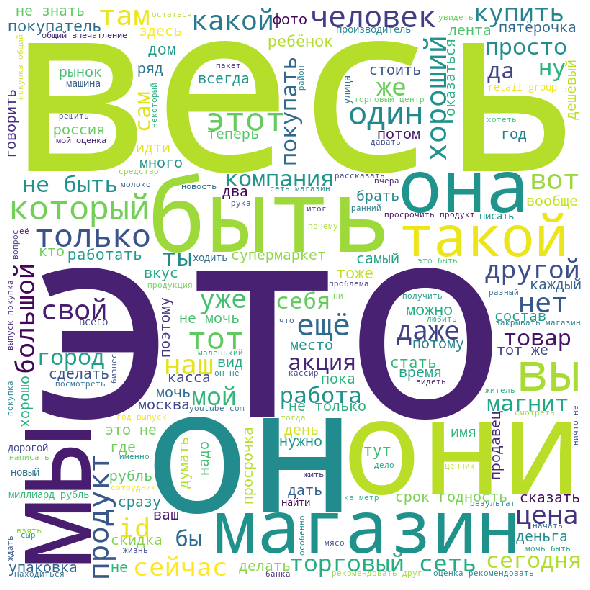

In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in data.text: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [3]:
my_string = data.text[3]
my_list = my_string.split(" ")
for i in range(100):
    my_string = data.text[i]
    my_list.append(my_string.split(" "))
    
#print(my_list)

In [4]:
from gensim.models import Word2Vec

model = Word2Vec(min_count=1)
model.build_vocab(my_list)  # prepare the model vocabulary
model.train(my_list, total_examples=model.corpus_count, epochs=model.iter) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


(37891, 41705)

In [5]:
vector = model.wv['этот']  # numpy vector of a word
print(vector)

[-2.3567481e-03  3.0082148e-03 -6.2363496e-04 -6.2596845e-04
  7.2998577e-04  3.0169177e-03  1.4767352e-03  2.9557734e-03
  3.9713620e-03  3.6516045e-03 -1.5661488e-03  4.1117519e-03
  2.7658960e-03  7.7747728e-04 -8.1121502e-04  4.2328457e-03
 -6.5896823e-03 -4.3650791e-03 -2.2165722e-04 -5.3791534e-03
  3.6113977e-03 -2.4452356e-03 -4.2352937e-03 -2.2821499e-03
 -3.8821059e-03 -1.5639873e-03 -2.2147878e-03  4.1068005e-03
  4.3009841e-03 -2.8691236e-03  4.7004027e-03  8.7413791e-06
  5.1528015e-03 -1.0356803e-03 -4.3544092e-04  2.5931059e-04
  4.9784863e-03  3.8384835e-03 -4.1908063e-03  8.6788222e-04
  1.2513121e-04  3.3817783e-03  3.3655274e-03  5.1160902e-03
  1.9689866e-04 -2.5063704e-03  5.2770413e-03  4.7028073e-04
 -2.4835812e-03  2.8908690e-03  3.2761833e-03  3.6121211e-03
  1.8021964e-03 -1.6695040e-03 -6.9596752e-04 -9.7729117e-03
  2.1302726e-03  4.9505066e-03 -1.8553983e-03 -5.7814927e-03
  1.3337673e-03  2.9912509e-03  4.8461561e-03 -4.4194632e-03
  3.0769929e-03 -2.41520

In [6]:
from sklearn.manifold import TSNE
import numpy as np

words_ak = []
embeddings_ak = []
for word in list(model.wv.vocab):
    embeddings_ak.append(model.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

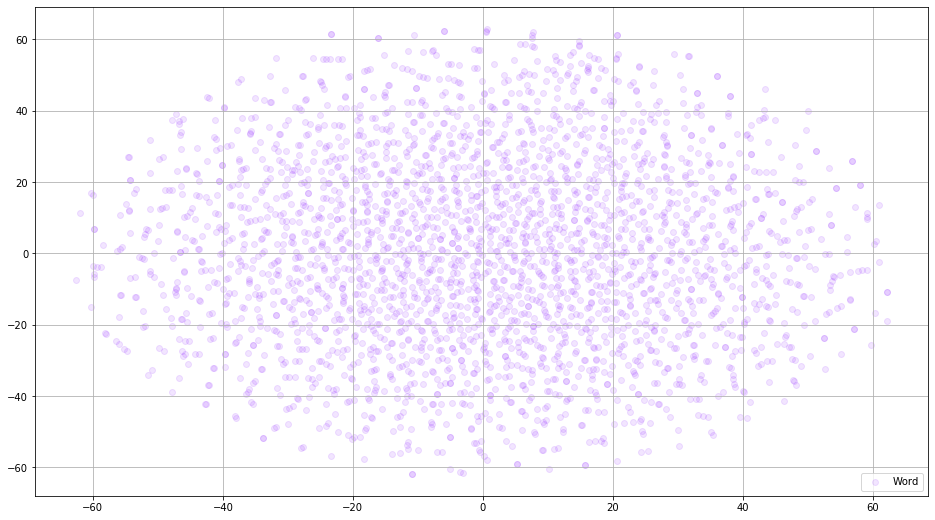

In [17]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Word', embeddings_ak_2d, a=0.1)

In [12]:
keys = [ 'он', 'этот']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [13]:
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


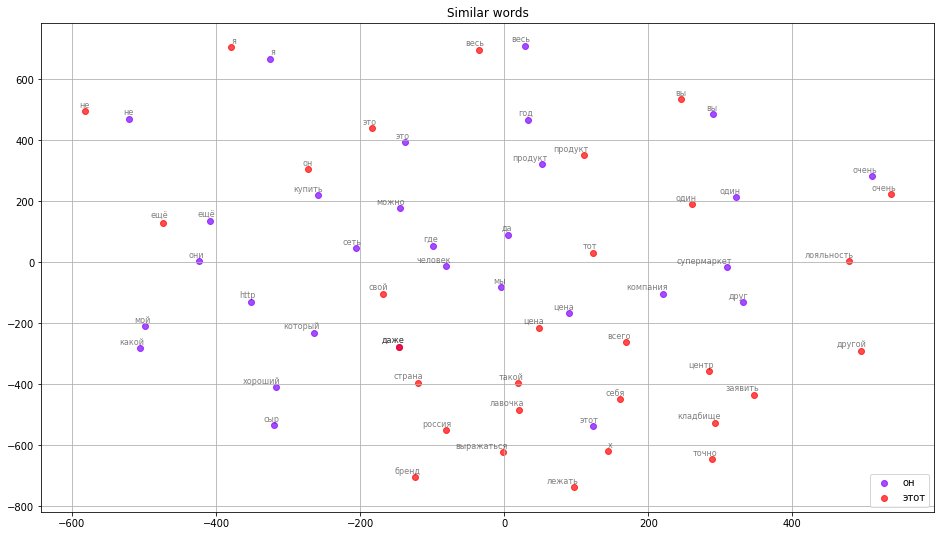

In [14]:
import matplotlib.cm as cm
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words', keys, embeddings_2d, word_clusters, 0.7,
                        'similar_words.png')